<a href="https://colab.research.google.com/github/samyaroy/Codeium/blob/main/Transaction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
from google.colab import auth
auth.authenticate_user()

In [209]:
import gspread
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)

In [210]:
num_sheets = len(gs.open('Transaction').worksheets())
print(num_sheets)
worksheetPrime = gs.open('Transaction').sheet1
#print(type(worksheetPrime))
worksheet = []
for i in range(num_sheets-2):
  worksheet.append(gs.open('Transaction').get_worksheet(i+1))



4


In [211]:
import pandas as pd

rows = worksheetPrime.get_all_values()
df = pd.DataFrame(rows)
print(df)


                 0            1               2            3            4
0   Financial Year       Amount  No of payments                          
1         2023 -24   ₹75,600.00              36                          
2          2024-25   ₹28,019.45              11                          
3                                                                        
4                                                                        
5                                                                        
6                                                                        
7                                                                        
8                                                                        
9                                                                        
10                                                                       
11                                                                       
12                                    

In [212]:
print(worksheet)

[<Worksheet '2023-24' id:0>, <Worksheet '2024-25' id:1891276261>]


In [213]:

rows_=[]
for Wsheet in worksheet:
  rows_.append(Wsheet.get_all_values())
df_=[]
for Row in rows_:
  df_.append(pd.DataFrame(Row))



In [214]:
import numpy as np

#for DF in df_:
  #P_list=DF['Particulars']
  #print(DF)

#print(P_list)
df_cleaned = [df_[0]] + [df.iloc[1:] for df in df_[1:]]


Comb_df_=pd.concat(df_cleaned).reset_index(drop=True)
Comb_df_.columns = Comb_df_.iloc[0]
Comb_df_ = Comb_df_[1:]
Comb_df_['Mode'].replace('', np.nan, inplace=True)
Comb_df_=Comb_df_.dropna(subset=['Mode']).reset_index(drop=True)
print(Comb_df_)#refined and final data set
#print(len(Comb_df_[2]))
print(Comb_df_.columns)
#print(Comb_df_)

0          Date                                       Particulars   \
0   24-May-2023                                                1H1   
1   24-Jun-2023                                                1H1   
2   24-Jul-2023                                                1H1   
3   23-Aug-2023                                                1H1   
4   30-Sep-2023                                                1H1   
5    6-Nov-2023                                                1H1   
6    4-Dec-2023                                                1H1   
7    2-Jan-2024                                                1H1   
8   31-Jan-2024                                                1H1   
9   31-Jan-2024                                                1H1   
10   7-Aug-2023                                                2H1   
11   5-Sep-2023                                                2H1   
12   6-Oct-2023                                                2H1   
13  11-Nov-2023     

In [215]:
def convert_currency_to_int(currency_str):
    # Remove currency symbol and commas
    cleaned_str = currency_str.replace('₹', '').replace(',', '')
    # Convert to float and then to int
    return int(float(cleaned_str))


In [216]:
#print(Comb_df_.columns)
P_list=Comb_df_['Particulars '].unique()
print(P_list)

F_list=[]
for name in P_list:
  filtered_amnt = Comb_df_[Comb_df_['Particulars '] == name]['Amnt']
  #print(type(filtered_amnt))
  #print(filtered_amnt)
  F_list.append(filtered_amnt.apply(convert_currency_to_int).sum())
print(F_list)
print(len(F_list))
print(len(P_list))

['1H1' '2H1' '3H1' '4H1' '5GH1' '6G1' '1H1 & 1H2'
 'Ranjit Jha - Consultancy' 'Kakoli Sanyal - Consultancy'
 'AMAZON SELLER SERVICES PRIVATE LIMITED (Amazon Associate)']
[19300, 34200, 13900, 6000, 11200, 8100, 12800, -1200, -800, 119]
10
10


In [217]:
diag1=pd.DataFrame({'Source': P_list, 'Amount': F_list})
diag1['Source'] = diag1['Source'].replace({'1H1': '1H1 & 1H2'})
diag1_combined = diag1.groupby('Source').sum().reset_index()
diag1_combined['Source'] = diag1_combined['Source'].replace(
    {'AMAZON SELLER SERVICES PRIVATE LIMITED (Amazon Associate)': 'Amazon',
    'Kakoli Sanyal - Consultancy': 'Consultancy-KS',
    'Ranjit Jha - Consultancy': 'Consultancy-RJ'}
)


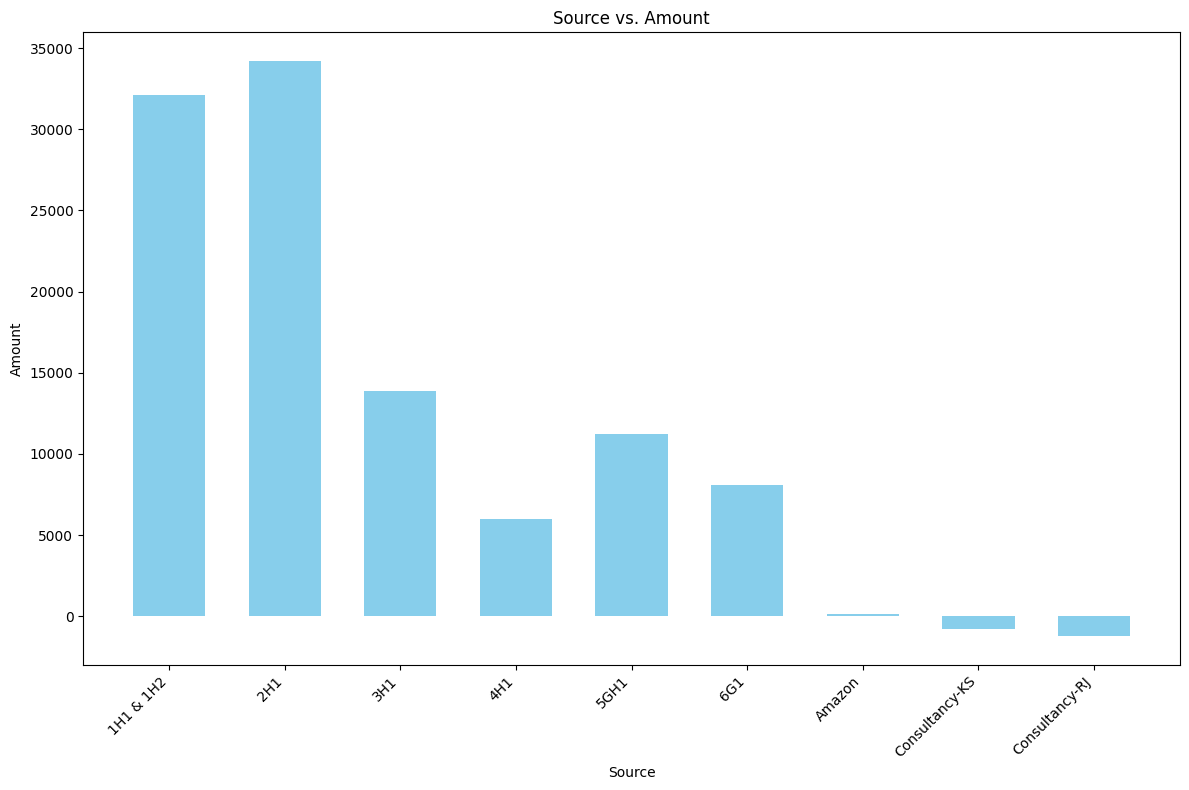

In [218]:
import matplotlib.pyplot as plt
# Create a bar diagram with increased gap between bars
plt.figure(figsize=(12, 8))

# Number of bars
num_bars = len(diag1_combined)

# Bar width and spacing
bar_width = 0.5  # Width of each bar
spacing = 0.3  # Space between bars

# Positions of bars
positions = range(num_bars)
bar_positions = [pos * (bar_width + spacing) for pos in positions]

# Create bars
plt.bar(bar_positions, diag1_combined['Amount'], width=bar_width, color='skyblue')

# Add title and labels
plt.title('Source vs. Amount')
plt.xlabel('Source')
plt.ylabel('Amount')

# Set x-ticks to be at the center of each bar
plt.xticks(bar_positions, diag1_combined['Source'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Colab_files/Diag1.png')
plt.show()

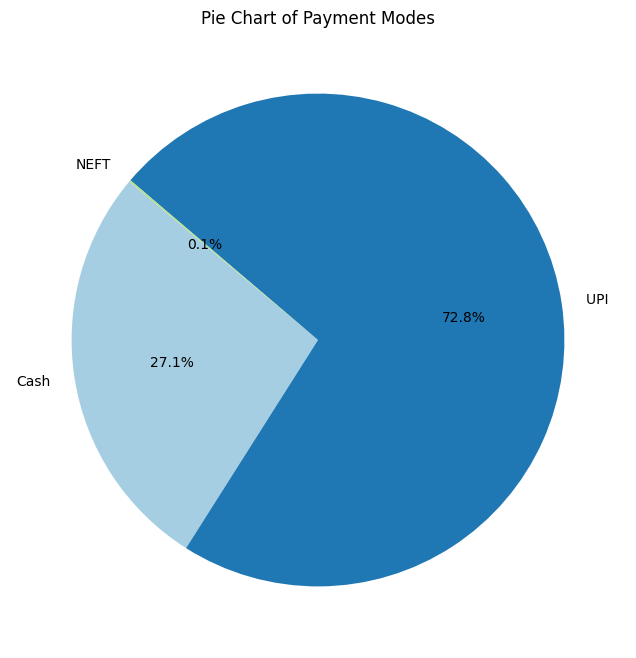

In [219]:
#print(Comb_df_.columns)
M_list=Comb_df_['Mode'].unique()
#print(M_list)

A1_list=[]
for name in M_list:
  filtered_amnt = Comb_df_[Comb_df_['Mode'] == name]['Amnt']
  #print(type(filtered_amnt))
  #print(filtered_amnt)
  A1_list.append(filtered_amnt.apply(convert_currency_to_int).sum())
#print(A1_list)

plt.figure(figsize=(10, 8))
plt.pie(A1_list, labels=M_list, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(M_list))), startangle=140)

# Add title
plt.title('Pie Chart of Payment Modes')

# Show the plot
plt.show()

[14119, 21900, 31100, 8400, 28100]
['SBI', 'BOB', 'IPPB', 'PNB', '-']
['SBI', 'BOB', 'IPPB', 'PNB', 'Cash']


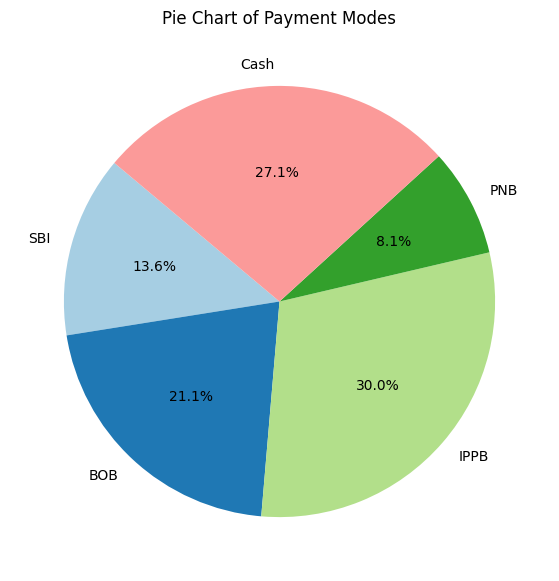

In [220]:
#print(Comb_df_.columns)
M_list=Comb_df_['Channel - Bank'].unique()
#print(M_list)

A1_list=[]
for name in M_list:
  filtered_amnt = Comb_df_[Comb_df_['Channel - Bank'] == name]['Amnt']
  #print(type(filtered_amnt))
  #print(filtered_amnt)
  A1_list.append(filtered_amnt.apply(convert_currency_to_int).sum())
#print(A1_list)

phrases = ['SBI', 'BOB', 'IPPB', 'PNB','-']

# Initialize a dictionary to hold the sum of values for each group
grouped_values = {phrase: 0 for phrase in phrases}

# Iterate over items and values to group them
for item, value in zip(M_list,A1_list):
    item_str = str(item)
    for phrase in phrases:
        if phrase in item_str:
            grouped_values[phrase] += value
            break  # Stop checking other phrases once a match is found

# Convert the dictionary to a list of sums
grouped_values_list = list(grouped_values.values())
print(grouped_values_list)

print(phrases)
#print(phrases.index('-'))
phrases[phrases.index('-')]='Cash'
print(phrases)

plt.figure(figsize=(10, 7))
plt.pie(grouped_values_list, labels=phrases, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Pie Chart of Payment Modes')

# Show the plot

plt.savefig('/content/drive/MyDrive/Colab_files/Diag2.png')
plt.show()

Index(['Date', 'Particulars ', 'Amnt', 'Mode', 'Channel - Bank',
       'Transaction ID', 'Platform Refference ID', 'Payment ID (internal)',
       'Recipt ID (Optional)', 'Remarks'],
      dtype='object', name=0)
0                                                Particulars    Amnt  \
Date                                                                   
2023-05-31                                                1H1    200   
2023-06-30                        Ranjit Jha - Consultancy1H1    100   
2023-07-31                                                1H1   2100   
2023-08-31                                             2H11H1   5100   
2023-09-30                                             2H11H1   5100   
2023-10-31                                                2H1   3000   
2023-11-30         3H1Kakoli Sanyal - Consultancy1H12H14H13H1   9600   
2023-12-31                                          1H14H12H1   6800   
2024-01-31                                    1H12H14H11H11H1   94

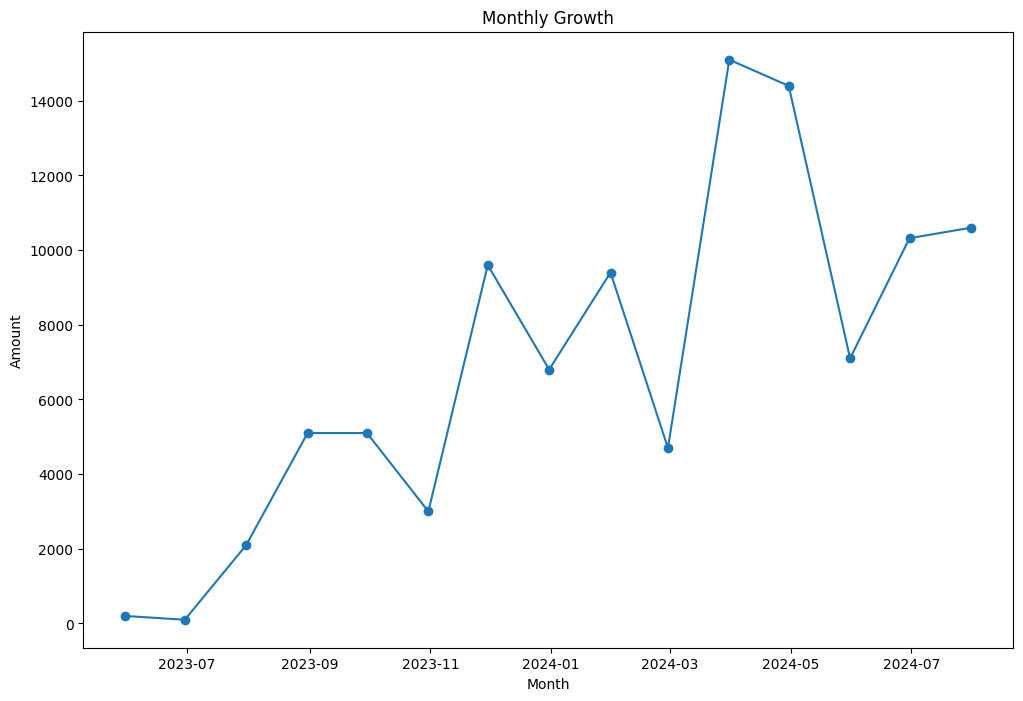

In [221]:
import re
import pandas as pd
print(Comb_df_.columns)
Comb_df_['Date']=pd.to_datetime(Comb_df_['Date'], format='%d-%b-%Y')
Comb_df_['Amnt'] = Comb_df_['Amnt'].apply(convert_currency_to_int)

Comb_df_.set_index('Date', inplace=True)
monthly_totals = Comb_df_.resample('M').sum()
print(monthly_totals)


plt.figure(figsize=(12, 8))
plt.plot(monthly_totals.index, monthly_totals['Amnt'], marker='o', linestyle='-')

# Add title and labels
plt.title('Monthly Growth')
plt.xlabel('Month')
plt.ylabel('Amount')

# Show plot

plt.savefig('/content/drive/MyDrive/Colab_files/Diag3.png')
plt.show()

In [222]:
import os
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
spreadsheet = gs.open('Transaction').worksheet('Analysis')
#last_worksheet = spreadsheet.get_worksheet(spreadsheet.worksheets()[-1].id)
drive_service = build('drive', 'v3', credentials=creds)

image_folder = '/content/sample_data'

# Function to upload all images from the folder to Google Drive
def upload_images_to_drive(folder_path):
    file_ids = []
    for image_file in os.listdir(folder_path):
        if image_file.endswith('.png'):
            file_metadata = {'name': image_file}
            media = MediaFileUpload(os.path.join(folder_path, image_file), mimetype='image/png')
            uploaded_file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
            file_ids.append(uploaded_file.get('id'))
    return file_ids

# Upload images and get file IDs
file_ids = upload_images_to_drive(image_folder)

In [223]:
def insert_images_into_sheet(sheet, file_ids):
    start_row = 2  # Starting row for the first image
    for idx, file_id in enumerate(file_ids):
        print(file_id)
        print(f'https://drive.google.com/uc?id={file_id}')
        print(idx)
        cell = f'A{start_row + idx * 10}'  # Spacing out images by 10 rows
        cell2=f'B{start_row + idx * 10}'
        image_url = f'=IMAGE("https://drive.google.com/uc?id={file_id}",3)'
        sheet.update(cell, [[image_url]], value_input_option="USER_ENTERED")
        sheet.update(cell2, [IMAGE(IMPORTDATA(cell))], value_input_option="USER_ENTERED")

# Insert images into the last worksheet
print(file_ids)
insert_images_into_sheet(spreadsheet, file_ids)

[]
